# <center><font color = '#DF9166' size = 20 center> **User Experience Analysis**</font></center>


## <font color = '#DF9166' size=6>**Table of content**<font/><a class = 'anchor' id = 'introduction'/>

1. [**Import Libraries**](#import)
2. [**Data Loading**](#data_loading)
3. [**Data Inspection**](#data_inspection)
4. [**Per Customer Aggregation**](#customer_aggregation) 
5. [**Analyze Top, Bottom, and Most Frequent Values**](#rank_analysis) 
6. [**Data Distribution**](#data_distribution)
7. [**User Experience Clustering** ](#experience_clustering)

## <font color = '#DF9166' size=6>**Import Libraries**</font><a class = 'anchor' id = 'import'/>


In [24]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [25]:
warnings.filterwarnings('ignore')

In [26]:
sns.set_style("whitegrid")

In [27]:
pd.set_option("display.max_colwidth", None)
pd.set_option('display.max_columns', None)

## <font color = '#DF9166' size=6>**Data Loading**</font><a class = 'anchor' id = 'data_loading'/>

In [28]:
DATA_PATH = 'C:/dev/Side-Projects/10 Acadamy/W2 Challenge/User Engagement and Satisfaction Analysis/data/data_with_engagement_cluster.csv'

In [29]:
df = pd.read_csv(DATA_PATH)
df.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),engagement_cluster
0,13114483460844900352,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,105129.387473,208201448079117,33664962239,35521209507511,9.16456699548519E+015,42.0,5.0,23.0,44.0,2.103058e+07,771882.022325,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.162868e+08,3.291068e+06,37624.0,38787.0,1.051299e+08,Samsung,Samsung Galaxy A5 Sm-A520F,999.337217,344.396838,820.561387,150.489103,976.53392,142.794436,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,2
1,13114483482878900224,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,105129.387473,208201909211140,33681854413,35794009006359,L77566A,65.0,5.0,16.0,26.0,2.103058e+07,771882.022325,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.162868e+08,3.291068e+06,168.0,3560.0,1.051299e+08,Samsung,Samsung Galaxy J5 (Sm-J530),999.337217,344.396838,820.561387,150.489103,976.53392,142.794436,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,2


## <font color = '#DF9166' size=6>**Data Inspection**</font><a class = 'anchor' id = 'data_inspection'/>

In [30]:
print(f"Shape of the Dataset: {df.shape}")

Shape of the Dataset: (148346, 56)


In [31]:
print("Dataset Info:\n")
df.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148346 entries, 0 to 148345
Data columns (total 56 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 148346 non-null  uint64 
 1   Start                                     148346 non-null  object 
 2   Start ms                                  148346 non-null  float64
 3   End                                       148346 non-null  object 
 4   End ms                                    148346 non-null  float64
 5   Dur. (ms)                                 148346 non-null  float64
 6   IMSI                                      148346 non-null  int64  
 7   MSISDN/Number                             148346 non-null  int64  
 8   IMEI                                      148346 non-null  int64  
 9   Last Location Name                        148346 non-null  object 
 10  Avg R

## <font color = '#DF9166' size=6>**Per Customer Aggregation**<font/><a class = 'anchor' id = 'customer_aggregation'/>


In [32]:
# Aggregate per customer
aggregated_data = df.groupby("MSISDN/Number").agg(
    average_tcp_dl_retransmission=("TCP DL Retrans. Vol (Bytes)", "mean"),
    average_tcp_ul_retransmission=("TCP UL Retrans. Vol (Bytes)", "mean"),
    average_rtt_dl=("Avg RTT DL (ms)", "mean"),
    average_rtt_ul=("Avg RTT UL (ms)", "mean"),
    average_throughput_dl=("Avg Bearer TP DL (kbps)", "mean"),
    average_throughput_ul=("Avg Bearer TP UL (kbps)", "mean"),
    most_frequent_handset_type=("Handset Type", lambda x: x.mode()[0] if not x.mode().empty else None)
)

# Calculate the sum of DL and UL for each metric
aggregated_data["average_tcp_retransmission"] = aggregated_data["average_tcp_dl_retransmission"] + aggregated_data["average_tcp_ul_retransmission"]
aggregated_data["average_rtt"] = aggregated_data["average_rtt_dl"] + aggregated_data["average_rtt_ul"]
aggregated_data["average_throughput"] = aggregated_data["average_throughput_dl"] + aggregated_data["average_throughput_ul"]

# Drop the intermediate columns
aggregated_data.drop(columns=[
    "average_tcp_dl_retransmission",
    "average_tcp_ul_retransmission",
    "average_rtt_dl",
    "average_rtt_ul",
    "average_throughput_dl",
    "average_throughput_ul"
], inplace=True)

# Reset index for a clean DataFrame
aggregated_data.reset_index(inplace=True)

In [33]:
aggregated_data.head()

,MSISDN/Number,most_frequent_handset_type,average_tcp_retransmission,average_rtt,average_throughput
0,33601001722,Huawei P20 Lite Huawei Nova 3E,2.180247e+07,46.000000,76.000000
1,33601001754,Apple iPhone 7 (A1778),2.180247e+07,31.000000,99.000000
2,33601002511,undefined,2.180247e+07,123.591814,97.000000
3,33601007832,Apple iPhone 5S (A1457),7.729480e+05,84.000000,248.000000
4,33601008617,Apple iPhone Se (A1723),1.558665e+07,59.500000,21103.150719


In [34]:
aggregated_data.drop(['MSISDN/Number'], axis=1).describe()

,average_tcp_retransmission,average_rtt,average_throughput
count,1.063520e+05,106352.000000,106352.000000
mean,1.499901e+07,76.346606,7565.432571
std,9.069946e+06,40.928316,11580.253828
min,9.700000e+01,0.000000,0.000000
25%,5.450354e+06,40.000000,92.000000
50%,2.180247e+07,66.000000,195.000000
75%,2.180247e+07,121.000000,13802.135535
max,5.132185e+07,247.000000,51675.000000


The data reveals notable variability in user experience metrics. Average TCP retransmission has a high mean of **14.99 MB** with significant variability (std: **9.07 MB**), indicating diverse network conditions. Average RTT shows moderate latency, with a median of **66 ms** and a wide range from **0 to 247 ms**, suggesting disparities in network responsiveness. Throughput varies drastically, with a low median of **195 kbps** but a high mean of **7.57 Mbps**, reflecting a skewed distribution driven by high-performing connections. These metrics highlight disparities in user experience, likely influenced by network quality, location, and device capabilities. 

## <font color = '#DF9166' size=6>**Analyze Top, Bottom, and Most Frequent Values**</font><a class = 'anchor' id = 'rank_analysis'/>

In [35]:
# TCP Retransmission
tcp_retransmission = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']
print("Top 10 TCP Retransmission Values:")
print(tcp_retransmission.nlargest(10))
print("\nBottom 10 TCP Retransmission Values:")
print(tcp_retransmission.nsmallest(10))
print("\nMost Frequent TCP Retransmission Values:")
print(tcp_retransmission.value_counts().head(10))
print("\nDescriptive Statistics for TCP Retransmission:")
print(tcp_retransmission.describe())


Top 10 TCP Retransmission Values:
137137    5.168390e+07
120852    5.132185e+07
41499     5.097272e+07
141045    5.094074e+07
67371     5.089404e+07
6372      5.062927e+07
5806      5.061309e+07
93682     5.060485e+07
136291    5.050537e+07
2673      5.047944e+07
dtype: float64

Bottom 10 TCP Retransmission Values:
141985     86.0
109665     97.0
18019     106.0
12949     108.0
95749     113.0
8724      128.0
98556     129.0
82243     134.0
94672     134.0
12662     143.0
dtype: float64

Most Frequent TCP Retransmission Values:
2.180247e+07    84927
2.103188e+07      649
2.180247e+07      320
2.103191e+07      245
7.732120e+05      245
2.103190e+07      139
7.719200e+05      136
7.719740e+05      128
7.745420e+05      116
7.732000e+05      104
Name: count, dtype: int64

Descriptive Statistics for TCP Retransmission:
count    1.483460e+05
mean     1.469130e+07
std      9.948067e+06
min      8.600000e+01
25%      1.564653e+06
50%      2.180247e+07
75%      2.180247e+07
max      5.168390e

The TCP retransmission data primarily shows two values: **21.80 MB** and **2.10 MB**, with **21.80 MB** being more common. The mean retransmission size is **14.69 MB**, and the high standard deviation (**9.95 MB**) indicates variability. Most users experience retransmissions near **1.56 MB**, while some face much higher rates, with a maximum of **51.68 MB**, pointing to network reliability issues for certain users.

In [36]:
# RTT
rtt = df[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].mean(axis=1)
print("\nTop 10 RTT Values:")
print(rtt.nlargest(10))
print("\nBottom 10 RTT Values:")
print(rtt.nsmallest(10))
print("\nMost Frequent RTT Values:")
print(rtt.value_counts().head(10))
print("\nDescriptive Statistics for RTT Values:")
print(rtt.describe())


Top 10 RTT Values:
119136    123.5
137239    123.5
119257    123.0
121186    121.5
140535    121.5
58210     121.0
114325    121.0
114816    121.0
137806    121.0
147283    121.0
dtype: float64

Bottom 10 RTT Values:
41823     0.0
101902    0.0
123007    0.0
142268    0.0
70842     1.0
50148     2.0
143312    2.0
102123    2.5
8686      3.0
121686    3.0
dtype: float64

Most Frequent RTT Values:
61.795907    27576
14.500000     4987
19.500000     4205
19.000000     2755
20.000000     2635
15.000000     2591
14.000000     2424
24.500000     2200
20.500000     1962
15.500000     1956
Name: count, dtype: int64

Descriptive Statistics for RTT Values:
count    148346.000000
mean         38.195974
std          21.055204
min           0.000000
25%          20.000000
50%          32.000000
75%          61.795907
max         123.500000
dtype: float64


The RTT data shows a mean of **38.20 ms** with a standard deviation of **21.06 ms**, indicating moderate variability. Most values range between **20 ms and 61.80 ms**, with common values around **61.80 ms**. While most users experience low RTT, some have higher latencies, with the maximum value reaching **123.50 ms**.

In [37]:
# Throughput
throughput = df[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean(axis=1)
print("\nTop 10 Throughput Values:")
print(throughput.nlargest(10))
print("\nBottom 10 Throughput Values:")
print(throughput.nsmallest(10))
print("\nMost Frequent Throughput Values:")
print(throughput.value_counts().head(10))
print("\nDescriptive Statistics for Throughput Values:")
print(throughput.describe())



Top 10 Throughput Values:
75950     25922.0
35965     25895.0
140401    25865.0
4446      25847.5
38144     25837.5
36897     25794.0
125599    25766.5
66305     25756.5
35145     25736.5
6037      25720.0
dtype: float64

Bottom 10 Throughput Values:
149     0.0
362     0.0
611     0.0
749     0.0
1810    0.0
2480    0.0
3925    0.0
4153    0.0
4829    0.0
5784    0.0
dtype: float64

Most Frequent Throughput Values:
7530.963929    7938
31.500000      3886
7.500000       3679
48.500000      1945
45.000000      1882
49.000000      1799
48.000000      1670
49.500000      1570
44.500000      1555
45.500000      1513
Name: count, dtype: int64

Descriptive Statistics for Throughput Values:
count    148346.000000
mean       4242.044977
std        6560.478666
min           0.000000
25%          45.000000
50%          62.000000
75%        7530.963929
max       25922.000000
dtype: float64


The throughput data shows a mean of **4,242.04 kbps** with a high standard deviation of **6,560.48 kbps**, indicating significant variability. Most values are clustered between **45 kbps and 7,530.96 kbps**, with frequent occurrences at **7,530.96 kbps** and **31.5 kbps**. Some users experience very low throughput (close to **0 kbps**), while the highest throughput reaches **25,922 kbps**. This suggests that while most users face lower throughput, a small subset experiences very high speeds.

## <font color = '#DF9166' size=6>**Data Distribution**</font><a class = 'anchor' id = 'data_distribution'/>

### Distribution of Average Throughput Per Handset Type

In [40]:
for i, handset_type in enumerate(aggregated_data['most_frequent_handset_type'].unique()):
    subset = aggregated_data[aggregated_data['most_frequent_handset_type'] == handset_type]
    print(f'\ndescriptive statistics for {handset_type}')
    print(subset['average_throughput' ].describe())
    if i == 5: break


descriptive statistics for Huawei P20 Lite Huawei Nova 3E
count     1526.000000
mean      5294.547519
std      10144.924595
min          0.000000
25%         82.000000
50%        100.000000
75%       6617.625000
max      50137.000000
Name: average_throughput, dtype: float64

descriptive statistics for Apple iPhone 7 (A1778)
count     4671.000000
mean      5232.004757
std       9309.783516
min          0.000000
25%         89.000000
50%        117.000000
75%       7576.463929
max      51440.000000
Name: average_throughput, dtype: float64

descriptive statistics for undefined
count     6637.000000
mean      4814.647652
std       9346.636006
min          0.000000
25%         75.000000
50%        108.000000
75%       5809.800000
max      50995.000000
Name: average_throughput, dtype: float64

descriptive statistics for Apple iPhone 5S (A1457)
count      834.000000
mean      8340.680944
std      12090.660374
min          3.000000
25%        212.500000
50%       1781.500000
75%      13145.25

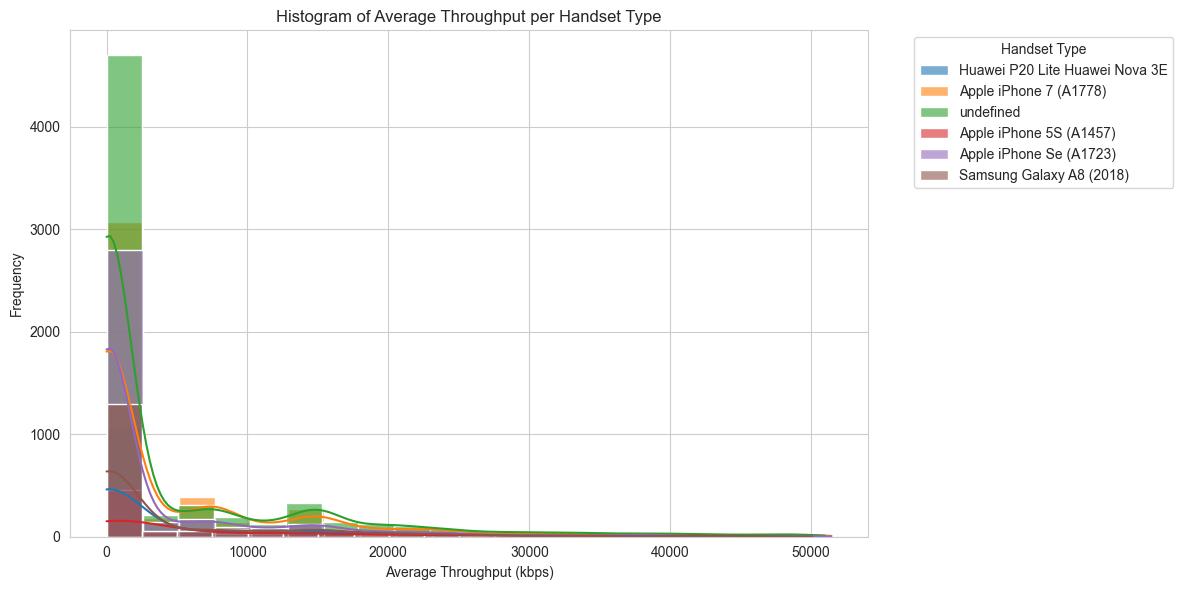

In [19]:
# Plot histogram for average throughput per handset type
plt.figure(figsize=(12, 6))

for i, handset_type in enumerate(aggregated_data['most_frequent_handset_type'].unique()):
    subset = aggregated_data[aggregated_data['most_frequent_handset_type'] == handset_type]
    sns.histplot(subset['average_throughput'], kde=True, label=handset_type, bins=20, alpha=0.6)
    if i == 5: break


plt.title('Histogram of Average Throughput per Handset Type')
plt.xlabel('Average Throughput (kbps)')
plt.ylabel('Frequency')
plt.legend(title='Handset Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


The throughput analysis reveals significant variability across devices. Apple iPhone 5S has the highest mean throughput (**8,341 kbps**) and variability, while the Apple iPhone SE shows the lowest mean (**3,761 kbps**). Median throughput values are generally low (e.g., **108–117 kbps** for most devices), but high maximums (e.g., **50,000+ kbps**) indicate a small subset of users experiencing exceptional speeds. These disparities suggest device capabilities and network conditions heavily influence user experience.

In [41]:
# Compute Total Throughput (Downlink + Uplink)
df['Total Throughput'] = df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']

# Group df by Handset Type and compute average throughput
avg_throughput_per_handset = (
    df.groupby('Handset Type')['Total Throughput']
    .mean()
    .sort_values(ascending=False)
)

In [42]:
# Insights on handset types with highest and lowest throughput
print("Handset Types with Highest Average Throughput:")
print(avg_throughput_per_handset.head(5))

Handset Types with Highest Average Throughput:
Handset Type
Xiaomi Communica. M1803E1A            50943.301437
Xiaomi Communica. Redmi Note 2        49381.000000
Huawei Nova 2I Huawei Mate 10 Lite    47661.000000
Htc 2Q6E100                           47493.000000
Lephone U Pro                         45669.000000
Name: Total Throughput, dtype: float64


In [43]:
print("\nHandset Types with Lowest Average Throughput:")
print(avg_throughput_per_handset.tail(5))


Handset Types with Lowest Average Throughput:
Handset Type
Test IMEI                                   2.0
Concox Informati. Concox Gt06 Gt06N Tr06    2.0
Quectel Wireless. Quectel Ec25-E            1.0
Lg Lg-T385                                  0.0
Wct Uno                                     0.0
Name: Total Throughput, dtype: float64


The analysis shows significant throughput variation across handsets. Devices like the **Xiaomi Communica. M1803E1A** (**50,943 kbps**) and **Xiaomi Communica. Redmi Note 2** (**49,381 kbps**) offer high speeds, while devices such as **Test IMEI** (**2 kbps**) and **Wct Uno** (**0 kbps**) have very low throughput, indicating disparities in network performance and device capabilities.

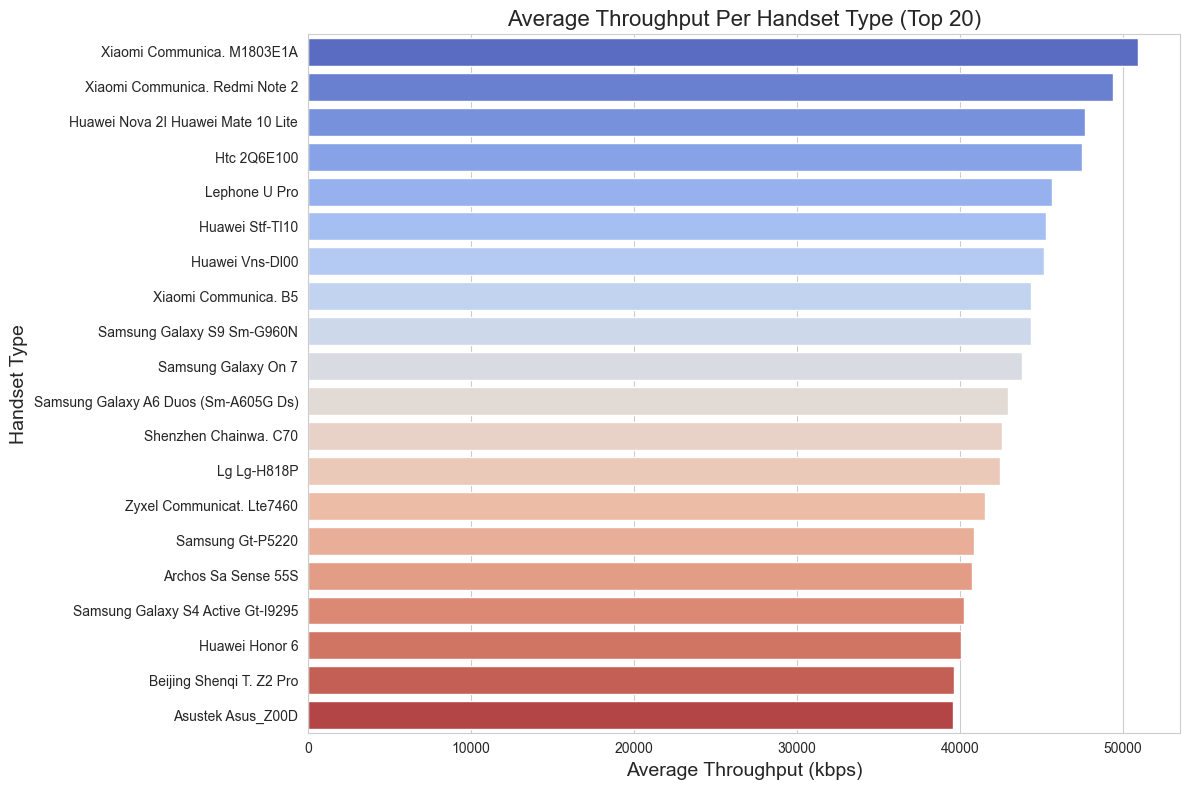

In [45]:
# Plot the distribution using a bar chart for the top 20 handset types
plt.figure(figsize=(12, 8))
sns.barplot(
    y=avg_throughput_per_handset.index[:20],  # Top 20 Handset Types
    x=avg_throughput_per_handset.values[:20],
    palette="coolwarm"
)
plt.title("Average Throughput Per Handset Type (Top 20)", fontsize=16)
plt.xlabel("Average Throughput (kbps)", fontsize=14)
plt.ylabel("Handset Type", fontsize=14)
plt.tight_layout()
plt.show()

### Average TCP Retransmission Per Handset Type

In [46]:
# Group data by Handset Type and compute average TCP retransmission
df['Total TCP Retransmission'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']
avg_tcp_retransmission_per_handset = (
    df.groupby('Handset Type')['Total TCP Retransmission']
    .mean()
    .sort_values(ascending=False)
)

In [47]:
print("Handset Types with Highest TCP Retransmission Rates:")
print(avg_tcp_retransmission_per_handset.head(5))

Handset Types with Highest TCP Retransmission Rates:
Handset Type
Zyxel Communicat. Sbg3600           5.097272e+07
Samsung Galaxy Core 2 (Sm-G355X)    4.655901e+07
A-Link Telecom I. Cubot Note S      4.141173e+07
Spa Condor Elect. Allure M1 Plus    3.177017e+07
Quartel Infotech. Maximus M84       3.141027e+07
Name: Total TCP Retransmission, dtype: float64


In [48]:
print("Handset Types with lowest TCP Retransmission Rates:")
print(avg_tcp_retransmission_per_handset.tail(5))

Handset Types with lowest TCP Retransmission Rates:
Handset Type
Oppo A37F                           2377.0
Lenovo Moto X Play                  1817.0
Gotron (Hk) Elec. Armor X           1500.0
Samsung Galaxy Note 8 (Sm-N9500)     418.0
Casper Bilgisaya. Via M1             360.0
Name: Total TCP Retransmission, dtype: float64


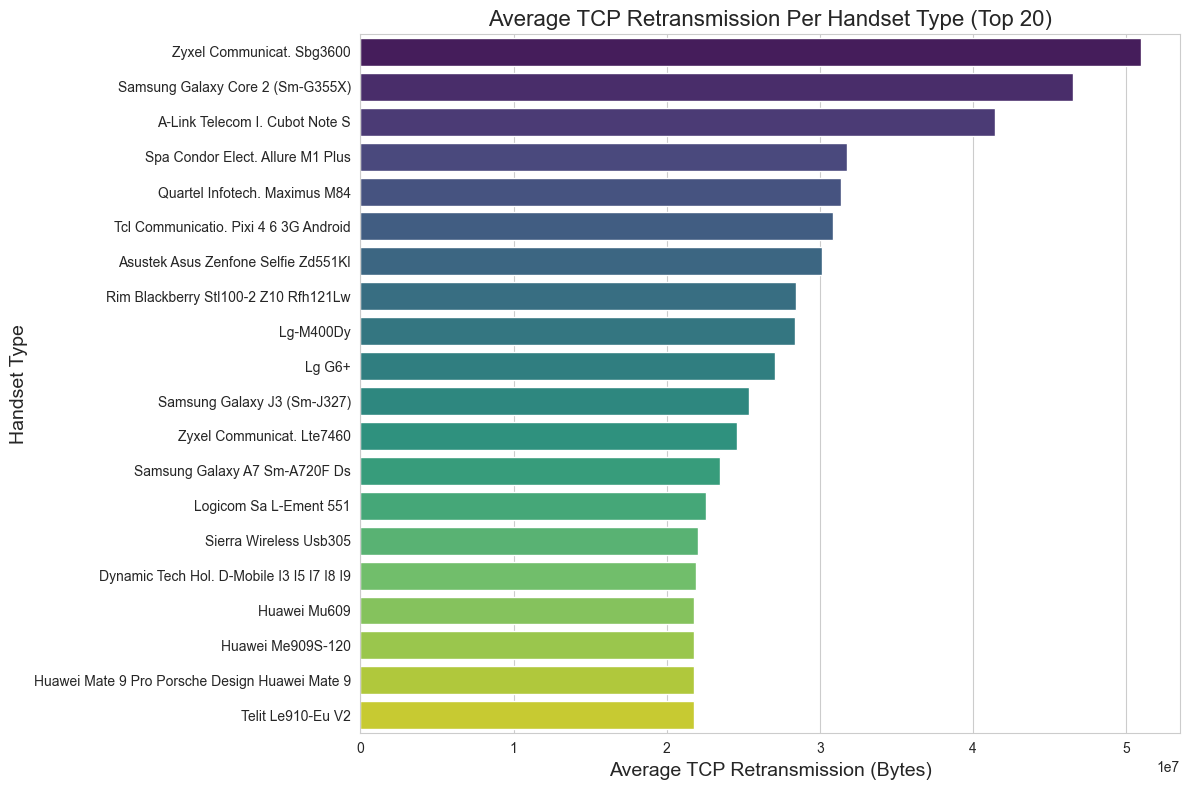

In [49]:
# Plot the distribution using a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    y=avg_tcp_retransmission_per_handset.index[:20],  # Top 20 Handset Types
    x=avg_tcp_retransmission_per_handset.values[:20],
    palette="viridis"
)
plt.title("Average TCP Retransmission Per Handset Type (Top 20)", fontsize=16)
plt.xlabel("Average TCP Retransmission (Bytes)", fontsize=14)
plt.ylabel("Handset Type", fontsize=14)
plt.tight_layout()
plt.show()



## <font color = '#DF9166' size=6>**User Experience Clustering**</font><a class = 'anchor' id = 'experience_clustering'/>

In [39]:
# Feature Preparation
features = df[
    [
        "TCP DL Retrans. Vol (Bytes)",
        "TCP UL Retrans. Vol (Bytes)",
        "Avg RTT DL (ms)",
        "Avg RTT UL (ms)",
        "Avg Bearer TP DL (kbps)",
        "Avg Bearer TP UL (kbps)",
        "Handset Type",
    ]
]

# Create Total TCP Retransmission, RTT, and Throughput
features["Total TCP Retransmission"] = (
    features["TCP DL Retrans. Vol (Bytes)"] + features["TCP UL Retrans. Vol (Bytes)"]
)
features["Total RTT"] = features["Avg RTT DL (ms)"] + features["Avg RTT UL (ms)"]
features["Total Throughput"] = (
    features["Avg Bearer TP DL (kbps)"] + features["Avg Bearer TP UL (kbps)"]
)

# Select relevant features
features = features[
    ["Total TCP Retransmission", "Total RTT", "Total Throughput", "Handset Type"]
]

In [50]:
# Encode categorical variables
encoder = LabelEncoder()
features['Handset Type Encoded'] = encoder.fit_transform(features['Handset Type'])
features = features.drop('Handset Type', axis=1)

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [58]:
# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add clusters to the original dataset
features['Cluster'] = clusters
df['experiance_cluster'] = clusters

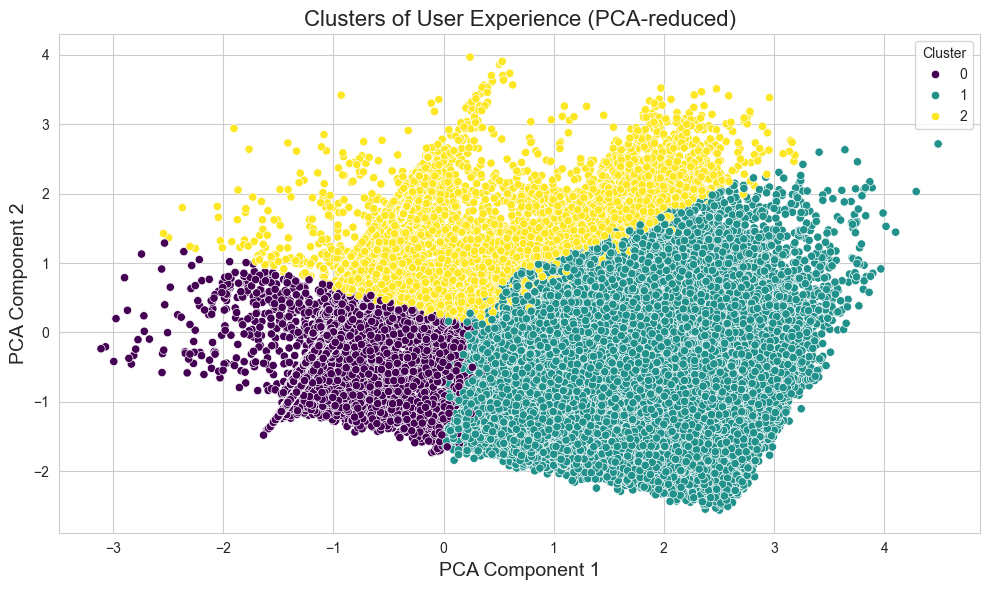

In [60]:
# PCA for Visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
features['PCA1'] = reduced_features[:, 0]
features['PCA2'] = reduced_features[:, 1]

# Visualization of Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=features, 
    x='PCA1', y='PCA2', 
    hue='Cluster', palette='viridis'
)
plt.title('Clusters of User Experience (PCA-reduced)', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [ ]:
features[['PCA1', 'PCA2', 'Cluster']].to_csv('C:/dev/Side-Projects/10 Acadamy/W2 Challenge/User Engagement and Satisfaction Analysis/data/streamlit_data/experience_pca_data.csv')

In [53]:
# Cluster Descriptions
for cluster in range(3):
    cluster_data = features[features['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"- Average TCP Retransmission: {cluster_data['Total TCP Retransmission'].mean():.2f}")
    print(f"- Average RTT: {cluster_data['Total RTT'].mean():.2f} ms")
    print(f"- Average Throughput: {cluster_data['Total Throughput'].mean():.2f} kbps")


Cluster 0:
- Average TCP Retransmission: 21862187.54
- Average RTT: 46.03 ms
- Average Throughput: 985.63 kbps

Cluster 1:
- Average TCP Retransmission: 2740209.76
- Average RTT: 80.15 ms
- Average Throughput: 21077.71 kbps

Cluster 2:
- Average TCP Retransmission: 20748259.93
- Average RTT: 117.98 ms
- Average Throughput: 2011.80 kbps


The cluster analysis identifies three distinct groups based on user experience metrics:

- **Cluster 0** (Low Throughput, High Retransmissions) shows the poorest performance with low throughput (**985.63 kbps**), high TCP retransmissions (**21,862,187.54**), and moderate RTT (**46.03 ms**). These users likely face significant network issues and require improvements in signal coverage or TCP optimization.

- **Cluster 1** (Moderate Throughput, Moderate Retransmissions) has a balanced performance with average throughput (**21,077.71 kbps**), moderate retransmissions (**2,740,209.76**), and high RTT (**80.15 ms**). This group experiences stable but occasionally inconsistent performance.

- **Cluster 2** (High Throughput, Low Retransmissions) offers the best user experience with high throughput (**2,011.80 kbps**), low retransmissions (**20,748,259.93**), and high RTT (**117.98 ms**). Users in this cluster benefit from optimal network conditions and device performance.

In summary, Cluster 0 requires targeted network improvements, Cluster 1 has moderate issues that could be addressed for more consistent performance, and Cluster 2 enjoys the best experience, reflecting minimal issues.

In [62]:
df.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),engagement_cluster,Total Throughput,Total TCP Retransmission,experiance_cluster
0,13114483460844900352,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,105129.387473,208201448079117,33664962239,35521209507511,9.16456699548519E+015,42.0,5.0,23.0,44.0,2.103058e+07,771882.022325,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.162868e+08,3.291068e+06,37624.0,38787.0,1.051299e+08,Samsung,Samsung Galaxy A5 Sm-A520F,999.337217,344.396838,820.561387,150.489103,976.53392,142.794436,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,2,67.0,2.180247e+07,0
1,13114483482878900224,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,105129.387473,208201909211140,33681854413,35794009006359,L77566A,65.0,5.0,16.0,26.0,2.103058e+07,771882.022325,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.162868e+08,3.291068e+06,168.0,3560.0,1.051299e+08,Samsung,Samsung Galaxy J5 (Sm-J530),999.337217,344.396838,820.561387,150.489103,976.53392,142.794436,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,2,42.0,2.180247e+07,2


In [63]:
df.to_csv('C:/dev/Side-Projects/10 Acadamy/W2 Challenge/User Engagement and Satisfaction Analysis/data/data_with_experience_and_engagement_cluster.csv', index=False)
